                                        Elevvo.tech                                                   
                            Machine learning Internship Tasks                                
                                    Due Date: 25th August 2025                                                 

---

                                  Muhammad Usman Fakhar                                                               
                                Machine learning tracks                                                    
                                                                                          

---

In [1]:
2+2

4

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_excel(r'C:\Users\Dell\OneDrive - Higher Education Commission\Desktop\Evolvo Internship\Task # 04\Mall Customers.xlsx')

In [4]:
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
195,196,F,35,High School,Married,120,79
196,197,F,45,High School,Unknown,126,28
197,198,M,32,Uneducated,Married,126,74
198,199,M,32,High School,Married,137,18
199,200,M,30,College,Married,137,83


In [6]:
df.shape

(200, 7)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Education                 0
Marital Status            0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.value_counts()

CustomerID  Gender  Age  Education    Marital Status  Annual Income (k$)  Spending Score (1-100)
1           M       19   High School  Married         15                  39                        1
2           M       21   Graduate     Single          15                  81                        1
3           F       20   Graduate     Married         16                  6                         1
4           F       23   High School  Unknown         16                  77                        1
5           F       31   Uneducated   Married         17                  40                        1
                                                                                                   ..
196         F       35   High School  Married         120                 79                        1
197         F       45   High School  Unknown         126                 28                        1
198         M       32   Uneducated   Married         126                 74           

In [11]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

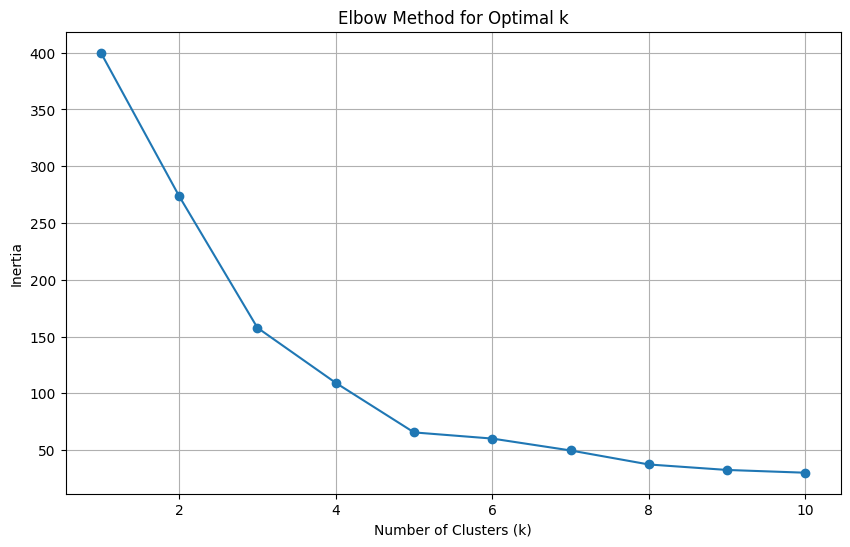

In [12]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print(df['Cluster'].value_counts())

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


In [14]:
score = silhouette_score(X_scaled,df['Cluster'])
print("Silhouette Score for kMeans:" , score)

Silhouette Score for kMeans: 0.5546571631111091


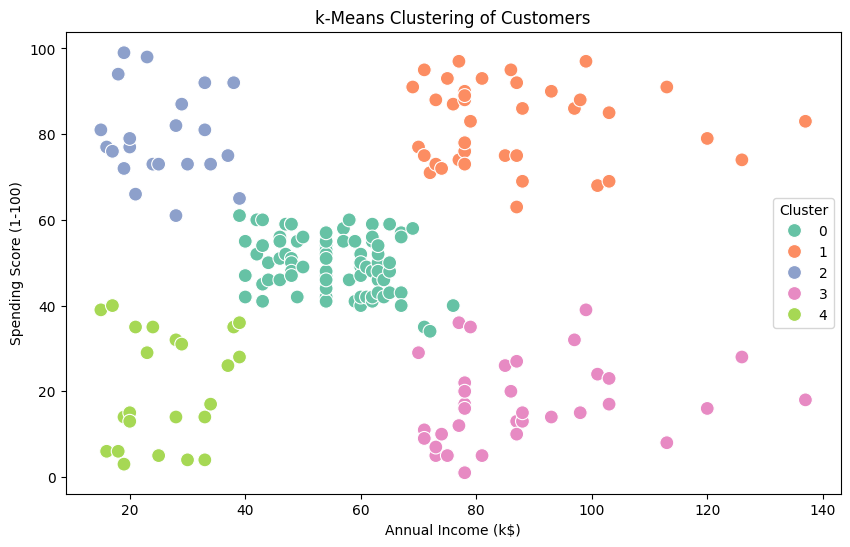

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title('k-Means Clustering of Customers')
plt.show()

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


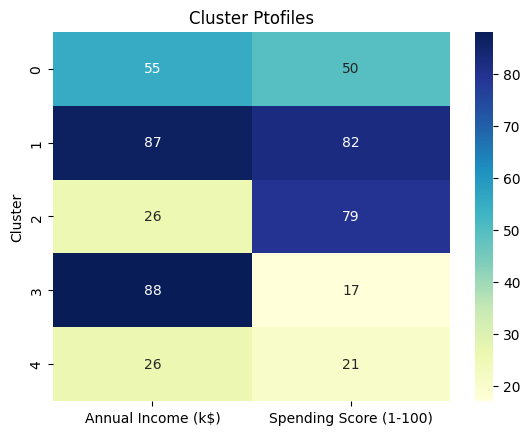

In [16]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu')
plt.title("Cluster Ptofiles")
plt.show()

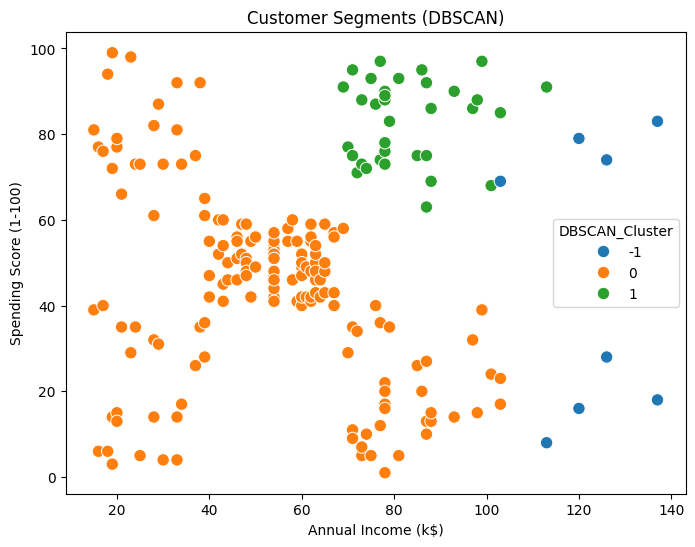

In [17]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],hue=df['DBSCAN_Cluster'],palette="tab10",s=80)
plt.title("Customer Segments (DBSCAN)")
plt.show()

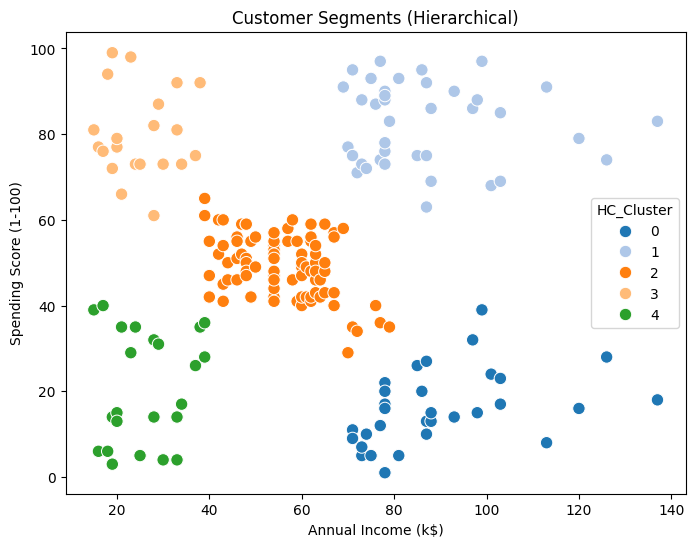

In [18]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['HC_Cluster'], 
    palette="tab20", 
    s=80
)
plt.title("Customer Segments (Hierarchical)")
plt.show()


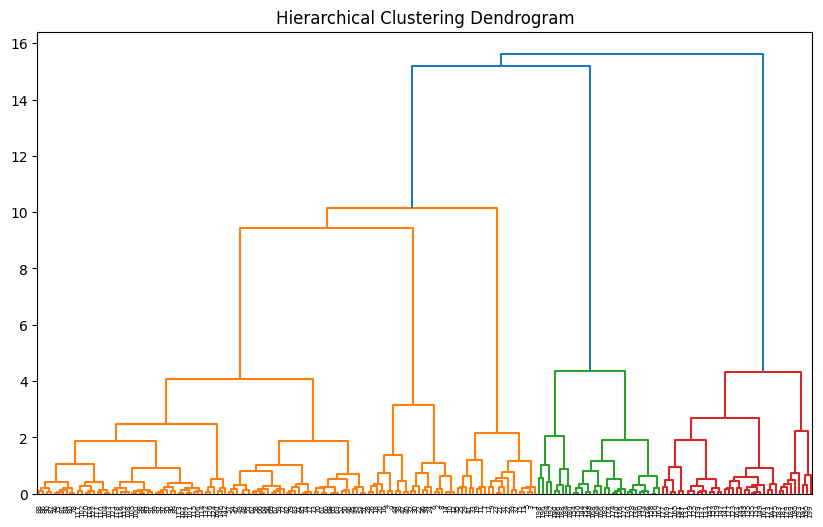

In [19]:
# Dendrogram
plt.figure(figsize=(10,6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()